In [1]:
import domain_adapt_run.domain_adapt_run.constants as constants
cache_folder_name = 'domain_adaptation_intro_figs'
seed = 42

In [2]:
import numpy as np
np.random.seed(seed)
import python_utils.python_utils.basic as basic
import python_utils.python_utils.caching as caching
log_folder = '%s/%s' % (constants.cache_folder, cache_folder_name)
caching.init(constants.cache_folder, constants.which_hash, basic.archiver(log_folder))
%load_ext autoreload
%autoreload 2

[Errno 17] File exists: '/Users/fultonw/Documents/projects/runs/domain_adapt_run/cache/domain_adaptation_intro_figs'


In [3]:
import matplotlib.pyplot as plt
import matplotlib
#plt.ion()
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display_pretty, display_html
import python_utils.python_utils.basic as basic
import pandas as pd
import pdb
import itertools
import functools
import scipy.stats
import cvxopt
import statsmodels.regression
import domain_adapt.domain_adapt.KR_metric as KR_metric

In [4]:
# define: p_y_given_x, p_x_a, p_x_b
x_dim = 1
boundary_dim = 0
p_y_given_x_sample = lambda x: np.ones(x_dim).dot(x) if x[boundary_dim] > 0 else -np.ones(x_dim).dot(x)
p_x_a_sample = lambda : np.random.uniform(low=0,high=1.,size=(1,))
p_x_b_sample = lambda : np.random.uniform(low=-1.,high=0.,size=(1,))

In [5]:
# define constants
big = 100
small = 10

In [6]:
# generate general data
n_a = 100
n_b = 100
x_as = np.array([p_x_a_sample() for i in xrange(n_a)])
x_bs = np.array([p_x_b_sample() for i in xrange(n_b)])
xs = np.concatenate((x_as,x_bs),axis=0)
ys = np.array([p_y_given_x_sample(x) for x in xs])

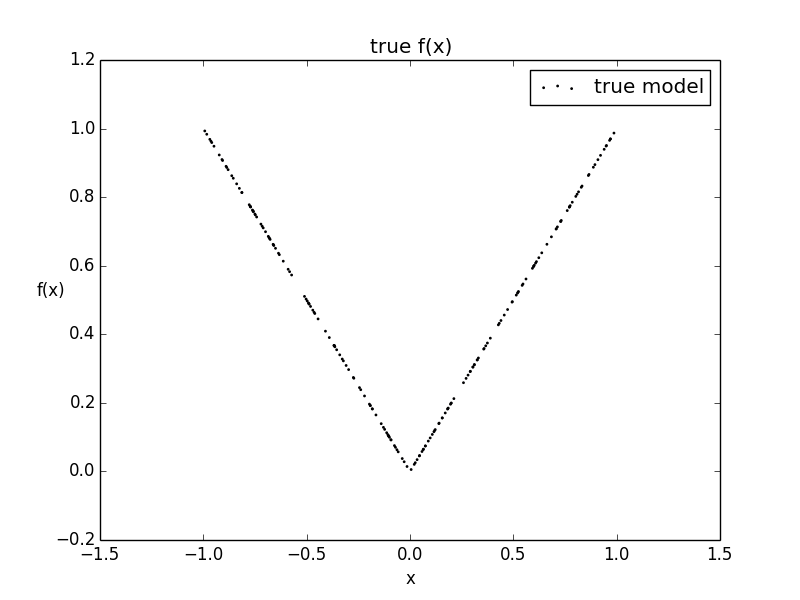

In [7]:
# plot true function
fig,ax = plt.subplots()
ax.scatter(xs[:,0],ys,s=1,label='true model')
ax.set_xlabel('x')
ax.set_ylabel('f(x)',rotation=0)
ax.set_title('true f(x)')
ax.legend()
basic.display_fig_inline(fig)

In [8]:
# generate a-biased data
n_a_train = big
n_b_train = small
x_as_train = np.array([p_x_a_sample() for i in xrange(n_a_train)])
x_bs_train = np.array([p_x_b_sample() for i in xrange(n_b_train)])
xs_train = np.concatenate((x_as_train,x_bs_train),axis=0)
ys_train = np.array([p_y_given_x_sample(x) for x in xs_train])

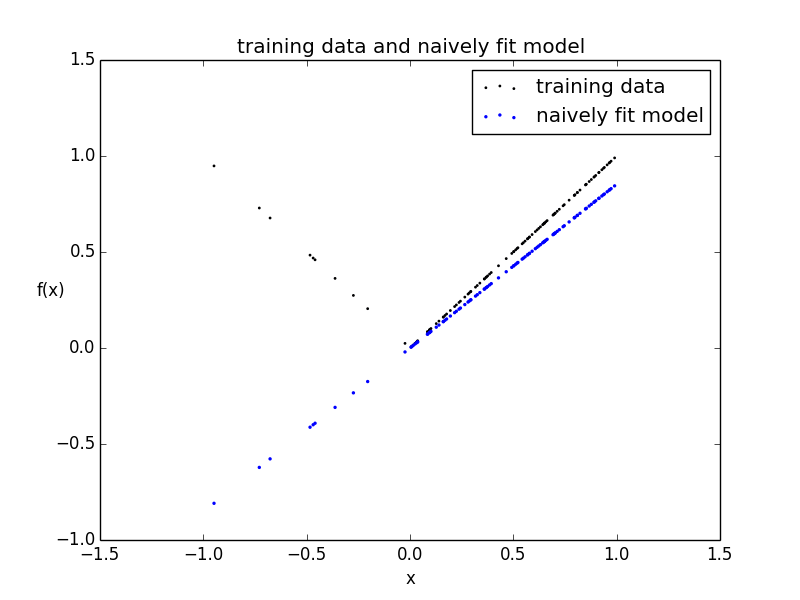

In [31]:
# plot a-biased data
fig,ax = plt.subplots()
ax.scatter(xs_train[:,0],ys_train,s=1,label='training data')
ax.set_xlabel('x')
ax.set_ylabel('f(x)',rotation=0)
ax.set_title('training data and naively fit model')
naive_model = statsmodels.regression.linear_model.WLS(xs_train,ys_train).fit()
ax.scatter(xs_train,naive_model.predict(xs_train),s=2,color='b',label='naively fit model')
ax.legend()
basic.display_fig_inline(fig)

In [10]:
# generate test data
n_a_test = small
n_b_test = big
x_as_test = np.array([p_x_a_sample() for i in xrange(n_a_test)])
x_bs_test = np.array([p_x_b_sample() for i in xrange(n_b_test)])
xs_test = np.concatenate((x_as_test,x_bs_test),axis=0)
ys_test = np.array([p_y_given_x_sample(x) for x in xs_test])

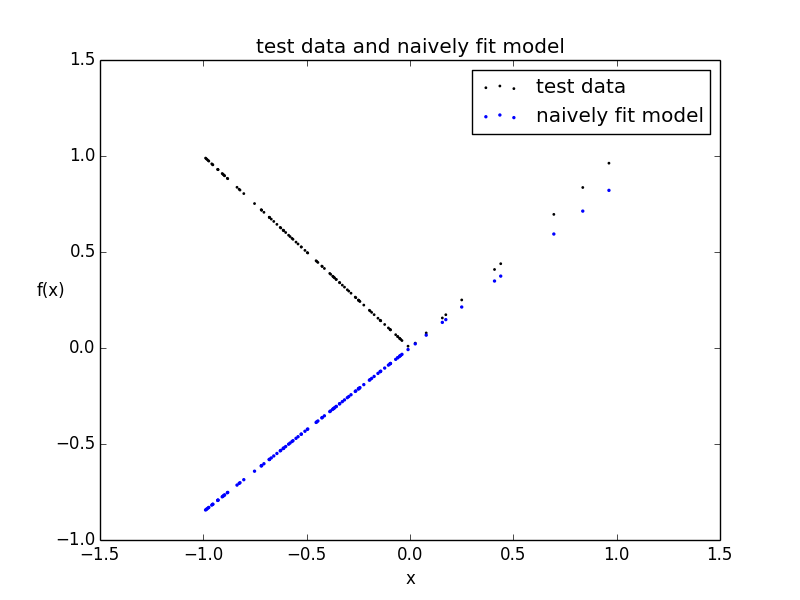

In [11]:
# plot test data
fig,ax = plt.subplots()
ax.scatter(xs_test[:,0],ys_test,s=1,label='test data')
ax.set_xlabel('x')
ax.set_ylabel('f(x)',rotation=0)
ax.set_title('test data and naively fit model')
#naive_model = statsmodels.regression.linear_model.WLS(xs,ys).fit()
ax.scatter(xs_test,naive_model.predict(xs_test),s=2,color='b',label='naively fit model')
ax.legend()
basic.display_fig_inline(fig)

In [29]:
# fit weighted model
ws_train = np.concatenate(((float(n_a_test)/n_a_train) * np.ones(n_a_train), (float(n_b_test)/n_b_train) * np.ones(n_b_train)))
print ws_train
adjusted_model = statsmodels.regression.linear_model.WLS(xs_train,ys_train,ws_train).fit()

[  0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1
   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1
   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1
   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1
   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1
   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1
   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1
   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1   0.1
   0.1   0.1   0.1   0.1  10.   10.   10.   10.   10.   10.   10.   10.
  10.   10. ]


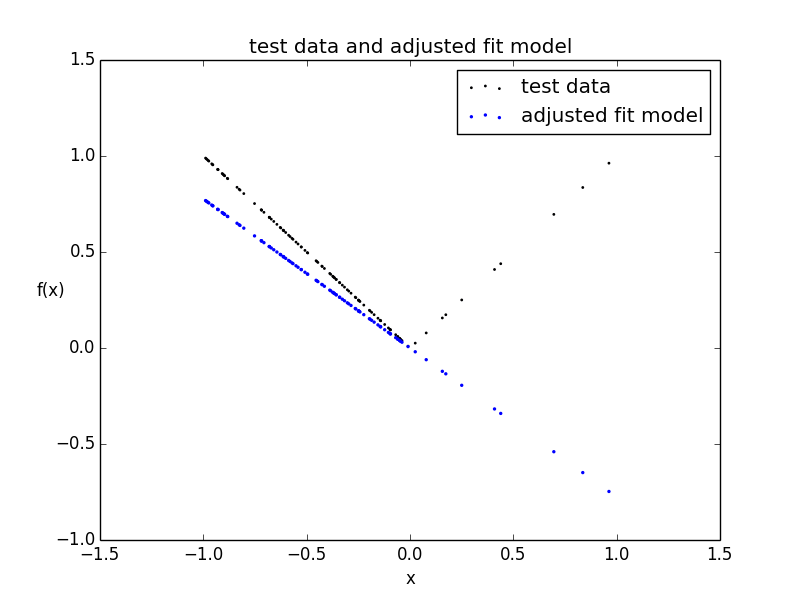

In [30]:
# plot weighted model
fig,ax = plt.subplots()
ax.scatter(xs_test[:,0],ys_test,s=1,label='test data')
ax.set_xlabel('x')
ax.set_ylabel('f(x)',rotation=0)
ax.set_title('test data and adjusted fit model')
#naive_model = statsmodels.regression.linear_model.WLS(xs,ys).fit()
ax.scatter(xs_test,adjusted_model.predict(xs_test),s=2,color='b',label='adjusted fit model')
ax.legend()
basic.display_fig_inline(fig)